# Линейная регрессия

In [1]:
import numpy as np

X - площадь дома, Y - цена

In [2]:
X = np.array([50, 60,70, 100])
X

array([ 50,  60,  70, 100])

In [3]:
Y = np.array([10, 30, 40, 50])
Y

array([10, 30, 40, 50])

In [4]:
from matplotlib import pyplot as plt


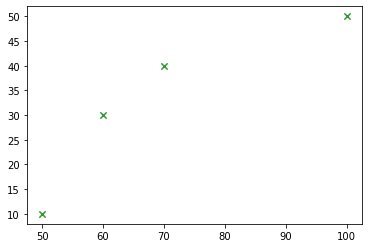

In [5]:
plt.scatter(X, Y, 40,'g', 'x', alpha = 0.8)

y = 0.714x - 17.5

In [6]:
from scipy import stats
import statsmodels.api as sm

In [7]:
X_constant = sm.add_constant(X) #тривиальная переменная (для расчета intercept)
mod = sm.OLS(Y, X_constant).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     8.889
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0965
Time:                        14:40:04   Log-Likelihood:                -13.062
No. Observations:                   4   AIC:                             30.12
Df Residuals:                       2   BIC:                             28.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5000     17.359     -1.008      0.4

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [8]:
from matplotlib import pyplot as plt
import numpy as np

In [9]:
mod.params

array([-17.5       ,   0.71428571])

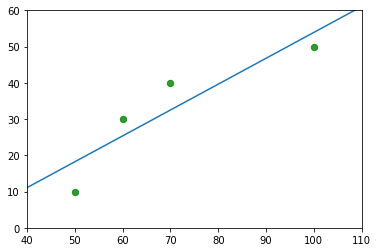

In [10]:
# задаем границы координатных осей
margin = 10
X_min = X.min() - margin
X_max = X.max() + margin

X_support = np.linspace(X_min, X_max, num = 10)

# Предсказания модели
Y_model = mod.params[1] * X_support + mod.params[0]
# настройка графика
plt.xlim(X_min, X_max)
plt.ylim(0, Y.max() + margin)

# рисуем исходные точки
plt.scatter(X, Y, 40, 'g', 'o', alpha = 0.8)

# предсказания модели
plt.plot(X_support, Y_model)

# Задание_1
Посчитайте предсказание и визуализируйте наборы точек \
х_task = [50, 60, 70, 100]\
y_task = [10, 15, 40, 45]

### Многомерный случай линейной регрессии

Как понять, что модель хорошо обучилась?\
Надо ввести метрику качества модели. Модель обучается, когда растет метрика качества. \
Чем меньше значение функции потерь, тем выше качество модели.


In [11]:
import pandas as pd

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(boston.data)
df_boston.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
features = boston.data
y = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
print(boston.feature_names.shape) 
print(y.shape)

(13,)
(506,)


In [15]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [16]:
features


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
import seaborn as sns

In [18]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


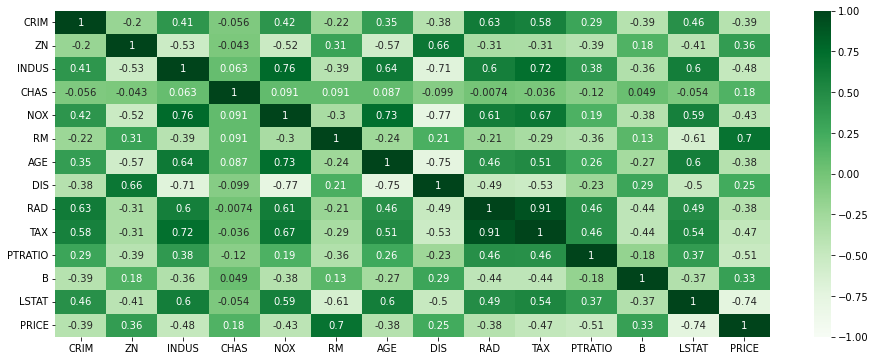

In [19]:
# Проверка на мультиколлинеарность
plt.figure(figsize = (16,6))
h_m = sns.heatmap(df_boston.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Greens')

####  Библиотечная реализация вычисляет коэффициенты не с помощью перемножения матриц, а с помощью приближенных методов для численного решения. 

Меньше задействуются ресурсы памяти

In [20]:
from sklearn.linear_model import LinearRegression
# Обучаем модель из коробки
reg = LinearRegression().fit(features, y) # метод fit отвечает за обучение
print(reg.coef_)
print(reg.intercept_)
print(reg.score(features, y))

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509025
0.7406426641094095


In [21]:
y_pred = reg.predict(features)

In [22]:
y_pred.shape

(506,)

Text(0, 0.5, 'Predicted values')

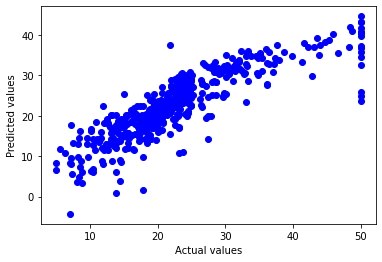

In [23]:
plt.scatter(y, y_pred, color = 'b')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


In [24]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.7406426641094095

#### На 'чистых' данных

In [25]:
df_boston_short = df_boston.drop(columns = ['TAX', 'RAD', 'CHAS', 'PRICE'], axis = 1)

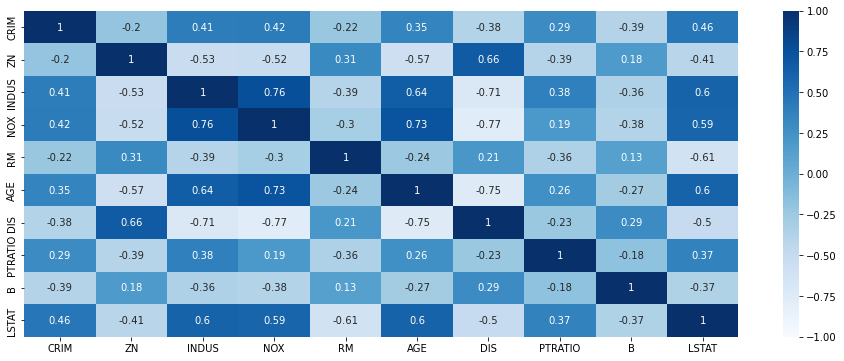

In [26]:
plt.figure(figsize = (16,6))
h_m = sns.heatmap(df_boston_short.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Blues')

In [27]:
from sklearn.linear_model import LinearRegression
# Обучаем модель из коробки
reg = LinearRegression().fit(features, y) # метод fit отвечает за обучение
print(reg.coef_)
print(reg.intercept_)
print(reg.score(features, y))

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509025
0.7406426641094095


In [28]:
features_short = np.array(df_boston.drop(columns = ['TAX', 'RAD', 'CHAS','PRICE'], axis = 1))

In [29]:
df_boston_short[:3]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03


In [30]:
features_short

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [31]:
from sklearn.linear_model import LinearRegression
# Обучаем модель из коробки
reg = LinearRegression().fit(features_short, y) # метод fit отвечает за обучение
print(reg.coef_)
print(reg.intercept_)
print(reg.score(features_short, y))

[-6.62592235e-02  4.10143003e-02 -3.41929097e-02 -1.41653558e+01
  4.20014112e+00 -2.11088316e-03 -1.50200735e+00 -8.56397636e-01
  8.70821599e-03 -5.26288565e-01]
29.351443331902793
0.7223884754863276


In [32]:
y_pred_short = reg.predict(features_short)

Text(0, 0.5, 'Predicted values')

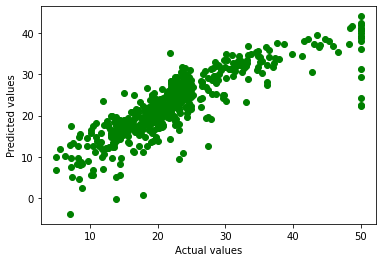

In [33]:
plt.scatter(y, y_pred_short, color = 'g')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [34]:
err = y - y_pred_short

err_d = pd.DataFrame(data = err)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

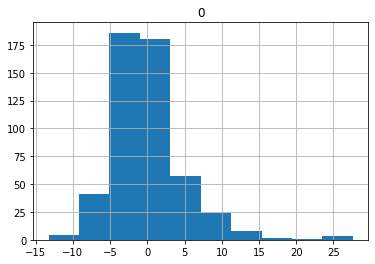

In [35]:
err_d.hist()

In [36]:
from scipy import stats


<Figure size 432x288 with 0 Axes>

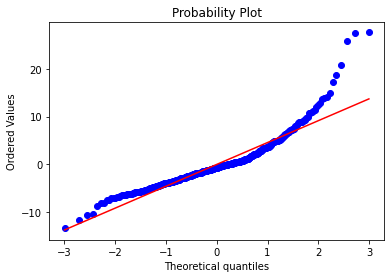

<Figure size 432x288 with 0 Axes>

In [37]:
stats.probplot(err, plot = plt)
plt.figure()

In [38]:
shapiro = stats.shapiro(err)
print('p-value', shapiro[1])

p-value 5.552051781092407e-19


In [39]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [40]:
print('Эксцесс', kurtosis(err))
print('Асимметрия', skew(err))

Эксцесс 6.3249583404128735
Асимметрия 1.7348291308401393


# Метрики качества линейной регрессии

Решение о том, какая модель хорошая, а какая плохая надо принимать не интуитивно, а на основе 1 или нескольких метрик машинного обучения

метрики принимают на вход 2 вектора: предсказания модели и истинные значения

In [41]:
reg = LinearRegression().fit(features, y) 

In [42]:
y_pred = reg.predict(features)
y_true = y

In [43]:
# Средняя абсолютная ошибка - Mean Absolut Error (MAE)

In [44]:
from sklearn.metrics import mean_absolute_error
print('MAE = %s' % mean_absolute_error(reg.predict(features),y))

MAE = 3.2708628109003177


In [45]:
from sklearn.datasets import load_boston
df_boston = load_boston()

y = boston.target
features = boston.data

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(features, y)

y_true = y
y_pred = reg.predict(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [46]:
# MSE

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_true, y_pred)

21.8948311817292

In [49]:
#RMSE - Root mean square error - базовая метрика для определения качества линейной регрессии

In [50]:
print('RMSE = %s' % mean_squared_error(reg.predict(features),y))
# метрика принимает только положительные знаения,  чем ближе к 0, тем лучше модель

RMSE = 21.8948311817292


RMSE сильнее штрафует за большие ошибки, чем MAE 

Если в выборке есть выбросы, то RMSE может принимать огромные значения и может сложиться впечатление, что модель плохо обучилась. 

НО! Если убрать все выбросы, метрика может очень сильно улучшиться. 

### Задание 2_ На понимание RMSE

y_pred; y_true \
Для каждой точки y_true постройте величину ошибки (еще называется остатки регрессии).\
Возведите ошибки в квадрат \ Постройте график ошибок (зависимоть квадрата ошибок от величины ошибки).

### R2 Коэффициент детерминации

Идеальное значение 1 - условная дисперсия модели относительно истинных значений очень мала

Всегда нормализован по верхней границе "1", RMSE и MAE могут становиться сколь угодно большими

In [51]:
from sklearn.metrics import r2_score
print('R2 = %s' % r2_score(y_true,y_pred))

R2 = 0.7406426641094095


### Трансформация входных данных

В алгоритмах машинного обучения и анализа данных часто встречаются требования по входным данным. 

Основной принцип ML: Garbage in - garbage out

Чтобы линейная регрессия хорошо работала, должны выполняться условия:\
    * ошибки регрессии должны иметь нормальное распределение \
    * все фичи должны быть в одном масштабе (метры, сантиметры)

При подготовке данных для задачи обучения линейной регрессии применяются приемы масштабирования и нормализации

Как преобразование входных данных может повлиять на метрики линейной регрессии?

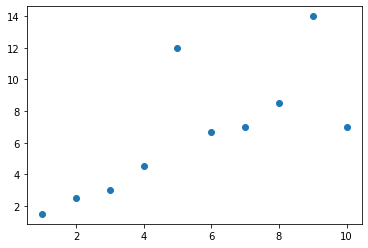

In [52]:
x = np.linspace(1,10,num = 10).reshape(-1,1)
y = np.array([1.5, 2.5, 3, 4.5, 12, 6.7, 7, 8.5, 14, 7]).reshape(-1,1)
plt.scatter(x, y)
# Данные вроде бы линейные, но есть выбросы

In [53]:
from sklearn.metrics import r2_score

In [54]:
reg = LinearRegression().fit(x,y) # на нетрансформируемых данных
y_pred = reg.predict(x)

print(r2_score(y, y_pred))

0.5221932366140851


Трансформируем точки с помощью функции логарифмирования

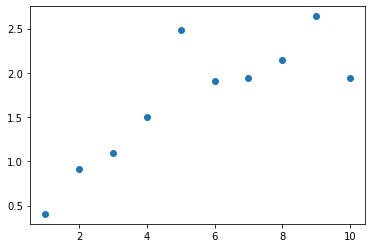

In [55]:
y_transformed = np.log(y)

plt.scatter(x, y_transformed) # Точки поджались, выбросы стали не такими сильными


In [56]:
reg = LinearRegression().fit(x,y_transformed) # на трансформируемых данных
y_pred = reg.predict(x)

print(r2_score(y_transformed, y_pred))
# Новая модель лучше предыдущей

0.6775796066529154


#### 1) Инженерные приемы улучшения метрики:\
    * np.log \
    * np.sqrt ...

Оба приема - монотонные: меняются величины, но порядок сохраняется

#### 2) Z-score normalization
    Преобразование, которое позволяет сгладить данные и избавить их от выбросов (есть реализация в sklearn - StandardScaler)

In [57]:
from sklearn.preprocessing import StandardScaler
raw_data = y
print('Сырой датасет: %s' % raw_data.reshape(1, -1))

z_transformed_data = StandardScaler().fit_transform(raw_data).reshape(1, -1)
print('z_transformed_dataset: %s' % z_transformed_data)

Сырой датасет: [[ 1.5  2.5  3.   4.5 12.   6.7  7.   8.5 14.   7. ]]
z_transformed_dataset: [[-1.34387297 -1.08393622 -0.95396785 -0.56406274  1.38546285  0.0077981
   0.08577913  0.47568424  1.90533634  0.08577913]]


#### 3) Min/Max normalization 
(MinMax Scaling)

Этот метод переносит все точки в диапазон [0, 1] # внутренние расстояния сохраняются

X_scaled = (X - X_min) / (X_max - X_min)

In [58]:
from sklearn.preprocessing import MinMaxScaler
raw_data = y
print('Сырой датасет: %s' % raw_data.reshape(1, -1))

transformed_data = MinMaxScaler().fit_transform(raw_data).reshape(1, -1)
print('transformed_dataset: %s' % transformed_data)

Сырой датасет: [[ 1.5  2.5  3.   4.5 12.   6.7  7.   8.5 14.   7. ]]
transformed_dataset: [[0.    0.08  0.12  0.24  0.84  0.416 0.44  0.56  1.    0.44 ]]


#### Трансформацию данных надо применять в том случае, когда она улучшает ваши метрики!

* построить модель\
* вычислить метрику качества \
* выполнить преобразования \ 
* снова вычислить метрику качества \
* если метрика качества выросла, применить трансформацию и т.д

### Задание 
Дан массив независимой переменной от 1 до 10, у = [1, 3, 4, 2, 10, 5, 5, 2, 5, 10]\
Нормализуйте данные различными способами и постройте графики нормализованных значений. В каком случае предсказаельная модель ведет себя лучше?

### Полиномиальная регрессия

Внутри данных очень сложная структура. Они многомерные, что затрудняет анализ. А если данные еще и нелинейны?..

Модель линейной регрессии можно сделать более гибкой, если использовать нелинейные функции от исходных переменных - подход полиномиальной регрессии.

Чаще всего под нелинейными функциями подразумеваются степенные. вместо х вычисляются новые фичи - х**2, х**3... \
До того момента, пока качество решения нас не устроит

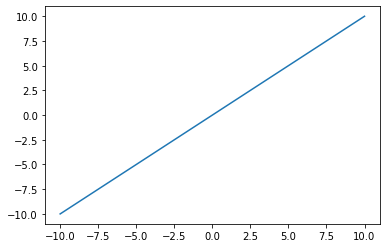

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, num = 100)
y = x # хотим отобразить эту функцию на графике

plt.plot(x, y)

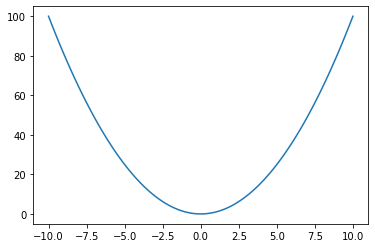

In [60]:
plt.plot(x, x*x)

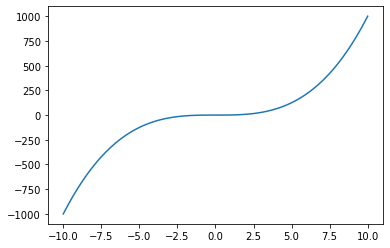

In [61]:
plt.plot(x, x*x*x)

#### сумма трех функций с разными коэффициентами

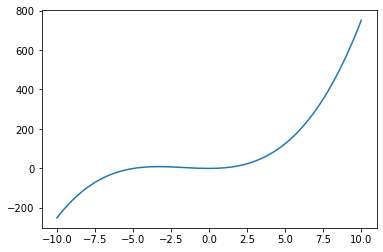

In [62]:
plt.plot(x, (0.5 * x*x*x + 2.5 * x*x + 0.1 * x))

В этом суть полиномиальной регрессии - мы можем сгенерировать несколько признаков из одного.

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('C:/Users/student/Desktop/non_linear.csv')

In [65]:
df[:2]

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313


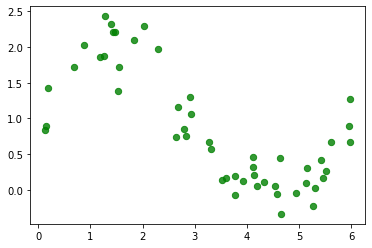

In [66]:
plt.scatter(df.x_train, df.y_train, 40, 'g', 'o', alpha = 0.8)
# зависимость нелинейная

Обучим модель

In [67]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df[['x_train']], df.y_train)

y_hat = reg.predict(df[['x_train']])

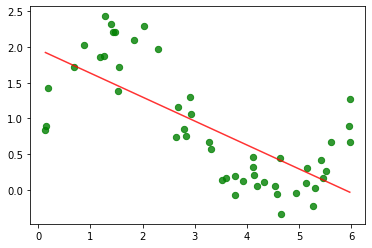

In [68]:
plt.scatter(df.x_train, df.y_train, 40, 'g', 'o', alpha = 0.8)
plt.plot(df.x_train, y_hat, 'r', alpha = 0.8)
# Прямая не в полной мере отображает то, как на самом деле ведут себя точки



### Задание

#### Посчитайте метрики ошибок

In [69]:
# Создадим функцию, которая принимает на вход одномерный массив, а возвращает n-мерный 
# (для каждой степени от 1 до degree)

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data ** n for n in range (1, degree + 1)]).T

In [70]:
degree = 5
X_5 = (generate_degrees(df.x_train, degree))
X_5.shape

(50, 5)

#### Как выглядит линейная регресия, обученная на полиномах различных степеней?

In [71]:
def train_polynomial (degree, df):
    X = generate_degrees(df.x_train, degree) # генерим данные
    model = LinearRegression().fit(X, df.y_train) # тренируем модель
    y_pred = model.predict(X)
    error = mean_squared_error(df.y_train, y_pred)
    print('Степень полинома  = %d; RMSE = %.3f' % (degree, error))
    plt.scatter(df.x_train, df.y_train, 40, 'g', '^', alpha = 0.8, label = 'data') # рисуем график
    plt.plot(df.x_train, y_pred)

Хотим подобрать ту степень полинома, которая будет уменьшать размер ошибки

Степень полинома  = 18; RMSE = 0.057


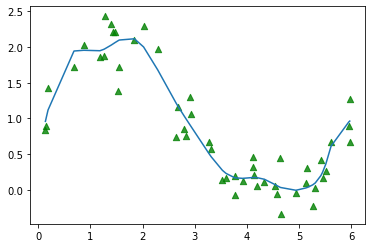

In [72]:
degree = 18

train_polynomial(degree, df)
# Большая степень дает нашей кривой больше свободы
# Но! С ростом степени полинома ошибка сначала уменьшается, потом опять начинает расти\
# снижается обобщающая способность (критично при появлении новых данных)

### Задание

Реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [73]:
degree = 20
X = generate_degrees(df.x_train, degree)

def grid_search_polynom(degree, df):
    X = generate_degrees(df.x_train, degree)
    model = LinearRegression().fit(X, df.y_train)
    y_pred = model.predict(X)
    r2_sq = r2_score(df.y_train, y_pred)
    print('При степени полинома = %d , r2_score = %.5f' % (degree, r2_sq))

for i in range(1, degree + 1):
    grid_search_polynom(i, df)
    
   


При степени полинома = 1 , r2_score = 0.51947
При степени полинома = 2 , r2_score = 0.53347
При степени полинома = 3 , r2_score = 0.88840
При степени полинома = 4 , r2_score = 0.89549
При степени полинома = 5 , r2_score = 0.89556
При степени полинома = 6 , r2_score = 0.89934
При степени полинома = 7 , r2_score = 0.90046
При степени полинома = 8 , r2_score = 0.90866
При степени полинома = 9 , r2_score = 0.90881
При степени полинома = 10 , r2_score = 0.90911
При степени полинома = 11 , r2_score = 0.90939
При степени полинома = 12 , r2_score = 0.91096
При степени полинома = 13 , r2_score = 0.91365
При степени полинома = 14 , r2_score = 0.91639
При степени полинома = 15 , r2_score = 0.91607
При степени полинома = 16 , r2_score = 0.91183
При степени полинома = 17 , r2_score = 0.90864
При степени полинома = 18 , r2_score = 0.91048
При степени полинома = 19 , r2_score = 0.90060
При степени полинома = 20 , r2_score = 0.89470


### Регуляризация

Специальная модификация модели линейной регрессии - Способ борьбы с переобучением (оверфиттинг)

Почему происходит переобучение? \
Все дело в механизме, с помощью которого мы подбираем параметры моделей \
Мы выбираем модель, которая дает лучший скор на обучающих данных

Как же детектировать переобучение?

#### Контроль на отложенной (валидационной) выборке (алгоритм)

1) разбиваем обучающую выборку на 2 части: по 80% (train_set) и 20% (validation_set) обучающих примеров \
2) выбираем метрику качества модели \
3) обучаем модель на тренировочном наборе данных \
4) делаем предсказание на валидационном наборе данных и вычисляем метрику качества

#### Если качество на валидации сильно хуже, чем на обучающем сете - модель переобучилась. 

Переобученную модель использовать нельзя, надо исправлять

В стандартной библиотеке sklearn есть два класса, в которых реализована регуляризация:\
* sklearn.linear_model.Ridge;
* sklearn.linear_model.Lasso.

Ridge и Lasso принимают на вход т.н. параметр регуляризации alpha, который принимает значения от 0 до 1. Чем ближе к 1, тем регуляризация сильнее (тем сильнее мы 'наказываем' модель за сильную подгонку под обучающие данные).

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data ** n for n in range (1, degree + 1)]).T

In [75]:
# сгенерируем данные для степени полинома degree = 8
degree = 8
X = generate_degrees(df.x_train, degree)
X.shape

(50, 8)

In [76]:
y = df.y_train.values # чтобы получить не объект из данных, а массив np.array
y.shape

(50,)

In [77]:
# Сгенерируем разбиение данных на тренировочную и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=10)
# random_state - разбиение не случайно
# test_size (20% - валидационная, 80% - обучающая)
# train_test_split возвращает 4 типа переменных

In [78]:
X_train.shape

(40, 8)

In [79]:
y_valid.shape

(10,)

In [80]:
# Обучим модель Ridge регрессии на тестовых данных
# формируем класс Ridge и передаем ему параметр регуляризации 
# alpha = 0 (означает, что никакой регуляризации нет)
model = Ridge(alpha = 0).fit(X_train, y_train) # модель на тренировочных данных обучена

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.97781e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [81]:
# Получим предсказания модели
# Обучились на одних данных, а значение хотим предсказать на валидационной выборке
y_pred = model.predict(X_valid) # Получили предсказание на данных, которых наша модель никогда раньше не видела

In [82]:
# Получим еще предсказание на той выборке, на которой обучали нашу модель
y_pred_train = model.predict(X_train)

In [83]:
# Оценим качество нашей модели
print('Качество валидации = %.3f' % mean_squared_error(y_valid, y_pred))
print('Качество обучения = %.3f' % mean_squared_error(y_train, y_pred_train))

Качество валидации = 0.119
Качество обучения = 0.052


### Задание 
обучите модель для степени полинома = 12

#### Задание 
победите переобучение самостоятельно. \
Обучите Ridge регрессию с параметром регуляризации, подберите лучшийю \
Удалось ли победить переобучение?




= 0.01 для 12-й степени полинома, как изменилась ошибка?

### Как найти степень, в которой недообученная модель становится переобученной? И как найти золотую середину?

Обучим полиномиальную регрессию для 3-х различных степеней 

Норма вектора - корень из суммы квадратов коэффициентов линейной регрессии. Чтобы избавиться от корня, возводим в квадрат - сумма квадратов коэффициентов регрессии. \
Готовая функция norm из numpy

#### Реализуем функцию для обучения линейной регрессии

In [84]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/student/Desktop/non_linear.csv')

In [85]:
data[:2]

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313


In [86]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm # модуль нормы вектора
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [87]:
degree = 12

In [88]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

Степень полинома 12
Ошибка на валидации 0.125
Ошибка на обучении 0.051
Норма вектора весов 	||w|| = 225.51


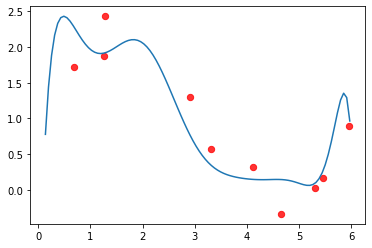

In [89]:
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values # выделяем целевую переменную у
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
error_valid = mean_squared_error(y_valid, y_pred)
error_train = mean_squared_error(y_train, y_pred_train)
print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
order_test = np.argsort(X_valid[:,0])
#train_test_split перемешивает данные, но чтобы проще было их визуализировать, можно ввести order_test (порядок на тестовых данных)
#argsort - сортирует массив от меньшего значения к большему и возвращает индексы элементов в отсортированном массиве

plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
# визуализируем решение
# linspace - функция, которая генерирует все точки в заданном диапазоне
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
# Надо посчитать предсказание модели во всех этих точках, чтобы график функции был непрерывным
# вызываем метод predict и мередаем в него метод linspace
y_linspace = model.predict(generate_degrees(x_linspace, degree))
plt.plot(x_linspace, y_linspace)

In [90]:
degrees = []
valid_errors = []
train_errors = []
w_norm = []

In [91]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель  
    дополнительно рисуем график
    """
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
    # визуализируем решение
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)

degrees = []
valid_errors = []
train_errors = []
w_norm = []

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	||w|| = 2.19


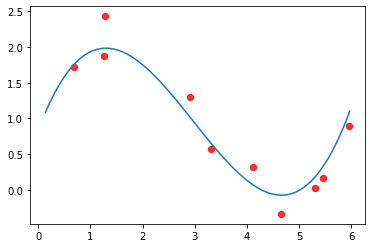

In [92]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)
# Сохраним наши полученные результаты
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов 	||w|| = 3.31


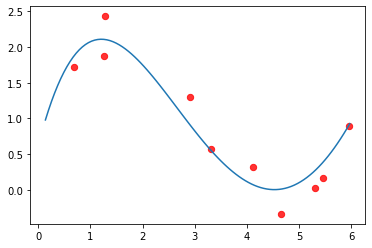

In [93]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов 	||w|| = 120.14


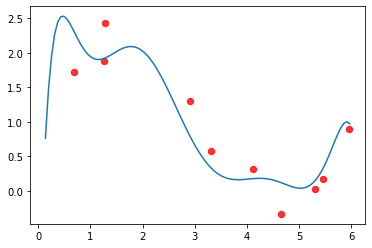

In [94]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

#### Выводы

1) При росте степени полинома ошибка на тренировочных данных падает \
2) С ростом степени полинома ошибка на валидации растет \
3) Если растет степень полинома, то норма вектора коэффициентов линейной регрессии тоже начинает расти

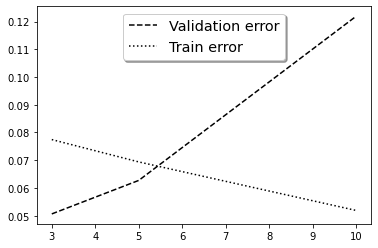

In [95]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()